# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Summary - Observable Trends:
* There is a strong relationship between latitude and max temperature - Positive latitude values (northern parts of the world) are showing warmer temperatures as compared to negative latitude values (southern parts of the world).
* The north and south show warmer temperatures closer to the equator (lat = 0) and cooler temperatures as their latitude moves from the equator. 
* Humidity, cloudiness, and wind speed show little to no relationship to latitude values.

In [ ]:
pip install citipy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as its being processed (with the city number and city name).


In [3]:
# Set up lists to hold response info
City_Name = []
Country = []
City_ID = []
Date = []
Lat = []
Long = []
Cloudiness = []
Humidity = []
Max_Temp = []
Wind_Speed = []

In [4]:
# Define the base URL and params
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
params = {
    "appid": weather_api_key,
    "units": units
}

In [5]:
# Loop through random CityPy list
for city in cities:
    params["q"] = city
    response = requests.get(base_url, params)
    response_json = response.json()
    try:
        City_Name.append(response_json['name'])
        Country.append(response_json['sys']['country'])
        City_ID.append(response_json['id'])
        Date.append(response_json['dt'])
        Lat.append(response_json['coord']['lat'])
        Long.append(response_json['coord']['lon'])
        Cloudiness.append(response_json['clouds']['all'])
        Humidity.append(response_json['main']['humidity'])
        Max_Temp.append(response_json['main']['temp_max'])
        Wind_Speed.append(response_json['wind']['speed'])
        print(f" City name is {city}.")
    except:  
        pass

 City name is airai.
 City name is kangaatsiaq.
 City name is jamestown.
 City name is talcahuano.
 City name is slavyanka.
 City name is zatoka.
 City name is portland.
 City name is bambanglipuro.
 City name is puerto ayora.
 City name is paamiut.
 City name is kumbo.
 City name is kimbe.
 City name is pandan.
 City name is port alfred.
 City name is tonantins.
 City name is new norfolk.
 City name is vagay.
 City name is henties bay.
 City name is clyde river.
 City name is east london.
 City name is busselton.
 City name is kapaa.
 City name is rikitea.
 City name is west bay.
 City name is kapit.
 City name is mataura.
 City name is tuktoyaktuk.
 City name is cherskiy.
 City name is ushuaia.
 City name is koslan.
 City name is mount gambier.
 City name is albany.
 City name is castro.
 City name is cayenne.
 City name is yellowknife.
 City name is barcelona.
 City name is hobart.
 City name is okhotsk.
 City name is puerto colombia.
 City name is hermanus.
 City name is villa bruz

 City name is mukhen.
 City name is dongsheng.
 City name is kabanjahe.
 City name is birjand.
 City name is pindwara.
 City name is kamyaran.
 City name is waipawa.
 City name is torbay.
 City name is salina cruz.
 City name is nantucket.
 City name is ishigaki.
 City name is palmer.
 City name is masterton.
 City name is manta.
 City name is grootfontein.
 City name is ucluelet.
 City name is nome.
 City name is lebu.
 City name is warri.
 City name is muros.
 City name is almaznyy.
 City name is charters towers.
 City name is priargunsk.
 City name is pontianak.
 City name is vestmanna.
 City name is codrington.
 City name is venado tuerto.
 City name is saint-georges.
 City name is port elizabeth.
 City name is bitkine.
 City name is fukue.
 City name is kabalo.
 City name is saint-augustin.
 City name is roald.
 City name is presidente epitacio.
 City name is bahir dar.
 City name is sri aman.
 City name is ahipara.
 City name is veraval.
 City name is miri.
 City name is khandyga

In [11]:
print(len(Country))
print(len(City_ID))
print(len(Date))
print(len(Lat))
print(len(Long))
print(len(Cloudiness))
print(len(Humidity))
print(len(Max_Temp))
print(len(Wind_Speed))

563
563
563
563
563
563
563
563
563


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# create a data frame from cities, and api information
weather_dict = {
    "City": City_Name,
    "Country" : Country,
    "City_ID" : City_ID,
    "Date" : Date,
    "Lat" : Lat,
    "Long" : Long,
    "Cloudiness" : Cloudiness,
    "Humidity" : Humidity,
    "Max_Temp" : Max_Temp,
    "Wind_Speed" : Wind_Speed
}

weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Country,City_ID,Date,Lat,Long,Cloudiness,Humidity,Max_Temp,Wind_Speed
0,Airai,TL,1651810,1584324058,-8.93,125.41,97,58,80.28,5.86
1,Kangaatsiaq,GL,3422683,1584324028,68.31,-53.46,100,92,0.99,12.53
2,Jamestown,US,5122534,1584324008,42.10,-79.24,1,39,30.99,4.70
3,Talcahuano,CL,3870282,1584324059,-36.72,-73.12,0,67,60.80,13.87
4,Slavyanka,RU,2016430,1584324059,42.86,131.38,81,41,34.86,4.70


In [54]:
# Export weather data to CSV
weather_data.to_csv(output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

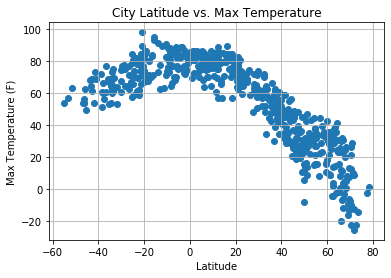

In [39]:
# Build a scatter plot
plt.scatter(weather_data["Lat"], weather_data["Max_Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure & plot
plt.savefig("Lat-v-Temp.png")
plt.show()

* The code above is plotting latitude versus max temperature for Monday, March 16, 2020 across 563 cities in the world.
* There is a strong relationship between latitude and max temperature.
* Positive latitude values (northern parts of the world) are showing warmer temperatures as compared to negative latitude values (southern parts of the world).

#### Latitude vs. Humidity Plot

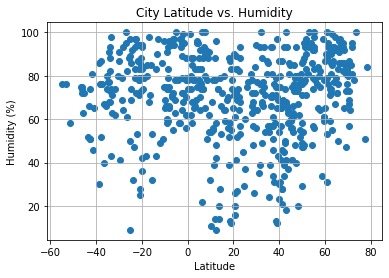

In [40]:
# Build a scatter plot
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure & plot
plt.savefig("Lat-v-Humidity.png")
plt.show()

* The code above is plotting latitude versus humidity for Monday, March 16, 2020 across 563 cities in the world.
* Based off the chart,  there is no relationship/correlation between the latitude and humidity %.
* On this particular day, humidity trended high across a large percentage of the cities.

#### Latitude vs. Cloudiness Plot

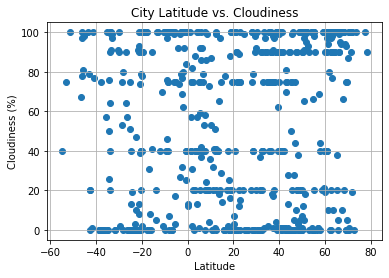

In [41]:
# Build a scatter plot
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure & plot
plt.savefig("Lat-v-Cloudiness.png")
plt.show()

* The code above is plotting latitude versus cloudiness % for Monday, March 16, 2020 across 563 cities in the world.
* There doesn't seem to be a strong relationship/correlation between the latitude and cloudiness %.
* The humidity varies quite a bit across all the cities regarless of latitude (seeing some data clusters).

#### Latitude vs. Wind Speed Plot

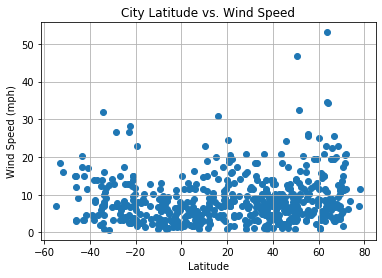

In [42]:
# Build a scatter plot
plt.scatter(weather_data["Lat"], weather_data["Wind_Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure & plot
plt.savefig("Lat-v-Windspeed.png")
plt.show()

* The code above is plotting latitude versus wind speed (mph) for Monday, March 16, 2020 across 563 cities in the world.
* There doesn't seem to be a strong relationship/correlation between the latitude and wind speed.
* The wind speed is heavily between 0-20% with some outliers on this given day.

## Linear Regression

In [43]:
# OPTIONAL: Create a function to create Linear Regression plots

In [44]:
# Create Northern Hemisphere DataFrame
North_df = weather_data.loc[weather_data["Lat"] >= 0.00 , :]
North_df.head()

,City,Country,City_ID,Date,Lat,Long,Cloudiness,Humidity,Max_Temp,Wind_Speed
1,Kangaatsiaq,GL,3422683,1584324028,68.31,-53.46,100,92,0.99,12.53
2,Jamestown,US,5122534,1584324008,42.10,-79.24,1,39,30.99,4.70
4,Slavyanka,RU,2016430,1584324059,42.86,131.38,81,41,34.86,4.70
5,Zatoka,UA,687557,1584324059,46.07,30.47,0,63,26.60,6.71
6,Portland,US,5746545,1584324050,45.52,-122.68,20,41,45.00,24.16


In [45]:
# Create Southern Hemisphere DataFrames
South_df = weather_data.loc[weather_data["Lat"] < 0.00 , :]
South_df.head()

,City,Country,City_ID,Date,Lat,Long,Cloudiness,Humidity,Max_Temp,Wind_Speed
0,Airai,TL,1651810,1584324058,-8.93,125.41,97,58,80.28,5.86
3,Talcahuano,CL,3870282,1584324059,-36.72,-73.12,0,67,60.80,13.87
7,Bambanglipuro,ID,1650434,1584324059,-7.95,110.28,7,66,85.93,7.96
8,Puerto Ayora,EC,3652764,1584324060,-0.74,-90.35,40,78,80.60,6.93
11,Kimbe,PG,2093967,1584324060,-5.55,150.14,100,63,86.05,5.32


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

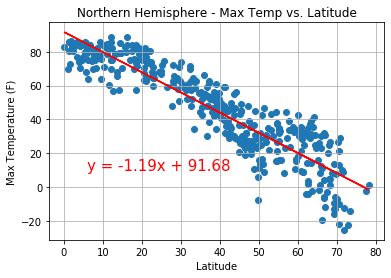

In [46]:
# Northern hemisphere linear regression
x_values = North_df['Lat']
y_values = North_df['Max_Temp']

#Line equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Build a scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("Northern Hemisphere - Max Temp vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)

# Save the figure & plot
plt.savefig("N_LR_Lat-v-Temp.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

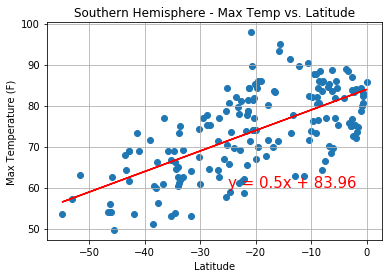

In [47]:
# Southern hemisphere linear regression
x_values = South_df['Lat']
y_values = South_df['Max_Temp']

#Line equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Build a scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,60),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("Southern Hemisphere - Max Temp vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)

# Save the figure & plot
plt.savefig("S_LR_Lat-v-Temp.png")
plt.show()

Northern and Southern Hemisphere - Max Temp vs. Latitude Linear Regressions:
* The north and southern hemispheres have an inverse relationship.
* The north and south show warmer temperatures closer to the equator (lat = 0) and cooler temperatures as their latitude moves from the equator. 
* The north hemisphere has a better fit with less variability as compared to the southern hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

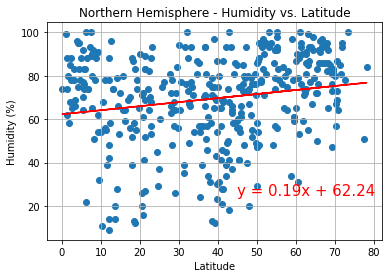

In [48]:
# Northern hemisphere linear regression
x_values = North_df['Lat']
y_values = North_df['Humidity']

#Line equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Build a scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,25),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("Northern Hemisphere - Humidity vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure & plot
plt.savefig("N_LR_Lat-v-Humidity.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

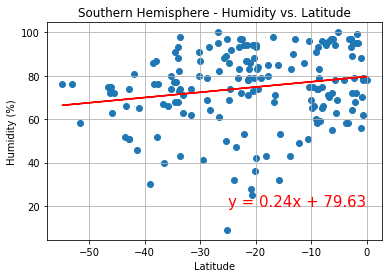

In [49]:
# Southern hemisphere linear regression
x_values = South_df['Lat']
y_values = South_df['Humidity']

#Line equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Build a scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,20),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("Southern Hemisphere - Humidity vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure & plot
plt.savefig("S_LR_Lat-v-Humidity.png")
plt.show()

Northern and Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression:
* Both regions show a positive slope, with lots of variability in the data.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

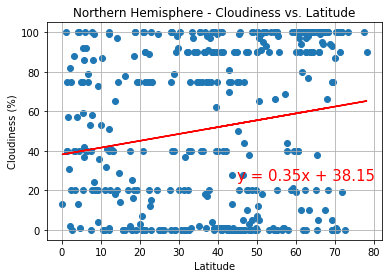

In [50]:
# Northern hemisphere linear regression
x_values = North_df['Lat']
y_values = North_df['Cloudiness']

#Line equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Build a scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,25),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("Northern Hemisphere - Cloudiness vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure & plot
plt.savefig("N_LR_Lat-v-Cloudiness.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

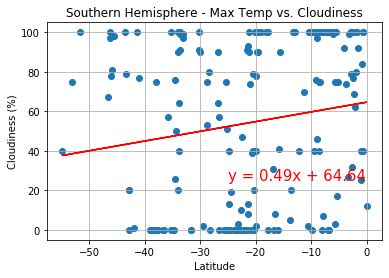

In [51]:
# Southern hemisphere linear regression
x_values = South_df['Lat']
y_values = South_df['Cloudiness']

#Line equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Build a scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,25),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("Southern Hemisphere - Max Temp vs. Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure & plot
plt.savefig("S_LR_Lat-v-Cloudiness.png")
plt.show()

Northern and Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression:
* Both show a positive slope
* Both data sets show lots of variability with clusters of data.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

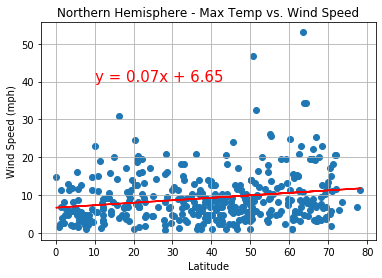

In [52]:
# Northern hemisphere linear regression
x_values = North_df['Lat']
y_values = North_df['Wind_Speed']

#Line equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Build a scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("Northern Hemisphere - Max Temp vs. Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)

# Save the figure & plot
plt.savefig("N_LR_Lat-v-WS.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

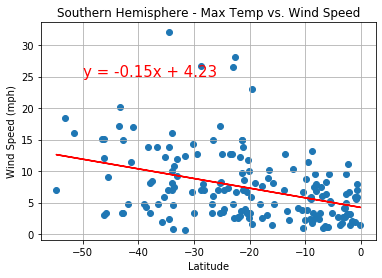

In [53]:
# Southern hemisphere linear regression
x_values = South_df['Lat']
y_values = South_df['Wind_Speed']

#Line equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Build a scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("Southern Hemisphere - Max Temp vs. Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)

# Save the figure & plot
plt.savefig("S_LR_Lat-v-WS.png")
plt.show()

Northern and Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression:
* The northern hemisphere shows a slightly positive slope while the southern exhibits a negative slope.
* The north and south are slightly windier as you move further from the equator.